# Modtran LibRadTran Models comparison on true astrophysical objects
===========================================================================================================

- author Sylvie Dagoret-Campagne
- date February 9th 2017



# 1) Packages
=========================

In [1]:
import rise
rise.__version__

'4.0.0b1'

In [2]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import pandas as pd
import os
import re
import numpy as np

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [5]:
from scipy.interpolate import interp1d

In [80]:
import string

In [6]:
import libLSSTMagnitude as magnit

## 1) SED
============

In [36]:
path_sed='./SED'

In [37]:
filename_star=['Star.B1.No.3.xlsx']
filename_gal=['Gal.S0.template.xlsx','Gal.BC.95.No.1.xlsx','Gal.GS.39.No.2.xlsx']
filename_pick_uk_xcl=['Pick.UK.No.2.22.xlsx','Pick.UK.50.No.4.xlsx']
filename_pick_uk_fits=['pickles_uk_22.fits','pickles_uk_50.fits']    # fits are the same file as above xcl file
filename_pick_110=['Pickles.No.1.110.xlsx','pickles_110.fits','pickles_110.ascii.txt'] # same files

## 2) Open Modtran Files
=============================

In [7]:
modtran_path="modtran_samples/MT_FirstSamples"

In [8]:
file6='Atmo.1.5.H2O.O2.O3.Rey.1.27.17.xlsx'

## 2.1) File 6 : Atmo.1.5.H2O.O2.O3.Rey.1.27.17.xlsx

In [9]:
fullfile6=os.path.join(modtran_path,file6)
mtfile6 = pd.ExcelFile(fullfile6)
sheet_name=mtfile6.sheet_names[0]
df_colname6 = mtfile6.parse(sheet_name,index_row=0,usecols=range(0,5))
df6 = mtfile6.parse(sheet_name,header=3,usecols=range(0,5))
df6.columns = ["wl","z15_pwv","z15_O2","z15_oz","z15_sc"]

In [10]:
df6.head()

,wl,z15_pwv,z15_O2,z15_oz,z15_sc
0,250.0,1.0,0.1014,0.0,0.0536
1,250.5,1.0,0.1154,0.0,0.0550
2,251.0,1.0,0.1305,0.0,0.0565
3,251.5,1.0,0.1466,0.0,0.0580
4,252.0,1.0,0.1639,0.0,0.0594


### Path to LibRadTran files for pure scattering atmosphere

In [11]:
path_atm_rt_us_sc="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sc/out"

### Path to LibRadTran for pure absorbing atmosphere

- pwv : warying water vapor
- oz  : varying ozone 

In [12]:
path_atm_rt_us_ab_rt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/ab/rt/oz/out'
path_atm_rt_us_ab_rt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/ab/rt/wv/out'

### Path to LibRadTran for scattering and absorbing atmosphere

- pwv : warying water vapor
- oz  : varying ozone 

In [13]:
path_atm_rt_us_sa_rt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/rt/oz/out'
path_atm_rt_us_sa_rt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/rt/wv/out'

# 3) All, scattering and absorption

In [14]:
wl,sed=magnit.MakeSED(lambda_min=300.,lambda_max=1099.,dlambda=1.,slope=1)

In [15]:
flt=magnit.Filter()    
wl_u,u=flt.get_u_tr()
wl_g,g=flt.get_g_tr()
wl_r,r=flt.get_r_tr()
wl_i,i=flt.get_i_tr()
wl_z,z=flt.get_z_tr()
wl_y4,y4=flt.get_y4_tr()

### Modtran

In [16]:
x_mt=df6["wl"]
pwv_mt=df6["z15_pwv"]
o2_mt=df6["z15_O2"]
oz_mt=df6["z15_oz"]
sc_mt=df6["z15_sc"]
y_mt=pwv_mt*o2_mt*oz_mt*sc_mt

### LibRadTran

In [17]:
sc_rt_path=os.path.join(path_atm_rt_us_sc,'RT_LS_pp_us_sc_rt_z15.OUT')
abs_rt_pwv_path=os.path.join(path_atm_rt_us_ab_rt_pwv,'RT_LS_pp_us_ab_rt_z15_wv40.OUT')
abs_rt_oz_path=os.path.join(path_atm_rt_us_ab_rt_oz,'RT_LS_pp_us_ab_rt_z15_oz32.OUT')
sa_rt_pwv_path=os.path.join(path_atm_rt_us_sa_rt_pwv,'RT_LS_pp_us_sa_rt_z15_wv40.OUT')
sa_rt_oz_path=os.path.join(path_atm_rt_us_sa_rt_oz,'RT_LS_pp_us_sa_rt_z15_oz32.OUT')

In [18]:
data1=np.loadtxt(sc_rt_path)
data2=np.loadtxt(abs_rt_pwv_path)
data3=np.loadtxt(abs_rt_oz_path)
data4=np.loadtxt(sa_rt_pwv_path)
data5=np.loadtxt(sa_rt_oz_path)

In [19]:
x_rt_1=data1[:,0]   # pure scatering
y_rt_1=data1[:,1]

x_rt_2=data2[:,0]   # pure absorption (H2O = 4mm) 
y_rt_2=data2[:,1]

x_rt_3=data3[:,0]   # pure absorption (OZ = 320 Db) 
y_rt_3=data3[:,1]

x_rt_4=data4[:,0]   # Both absorption and scattering (H2O = 4 mm)
y_rt_4=data4[:,1]

x_rt_5=data5[:,0]   # Both absorption and scattering (OZ = 320 mm)
y_rt_5=data5[:,1]

In [20]:
y_rt_6=y_rt_1*y_rt_2
y_rt_7=y_rt_1*y_rt_3

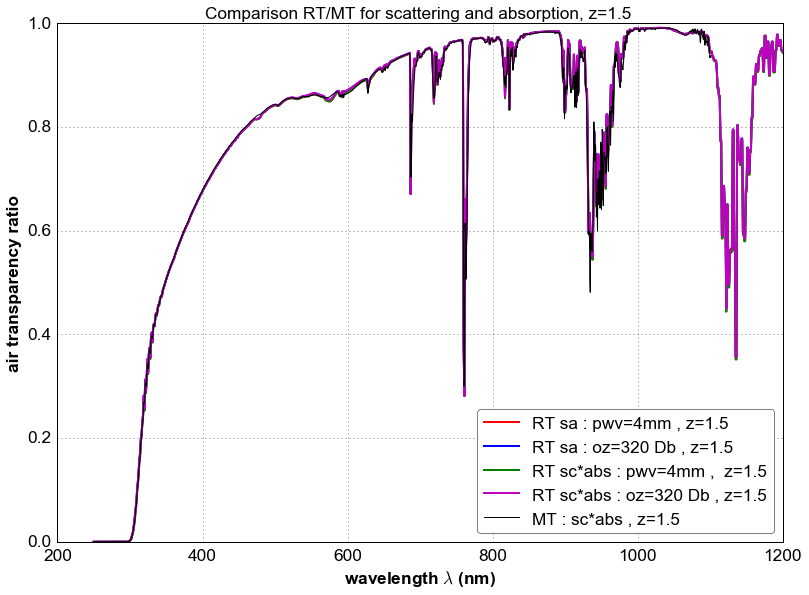

In [21]:
plt.title('Comparison RT/MT for scattering and absorption, z=1.5 ')
plt.plot(x_rt_4,y_rt_4,'r-',lw=2,label = 'RT sa : pwv=4mm , z=1.5')
plt.plot(x_rt_5,y_rt_5,'b-',lw=2,label = 'RT sa : oz=320 Db , z=1.5')
plt.plot(x_rt_1,y_rt_6,'g-',lw=2,label = 'RT sc*abs : pwv=4mm ,  z=1.5')
plt.plot(x_rt_1,y_rt_7,'m-',lw=2,label = 'RT sc*abs : oz=320 Db , z=1.5')
plt.plot(x_mt,y_mt,'k-',lw=1,label = 'MT : sc*abs , z=1.5')
plt.legend(loc=4)
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")

In [22]:
WLMIN=250
WLMAX=1099

In [23]:
interpol_atm_mt=interp1d(x_mt,y_mt)

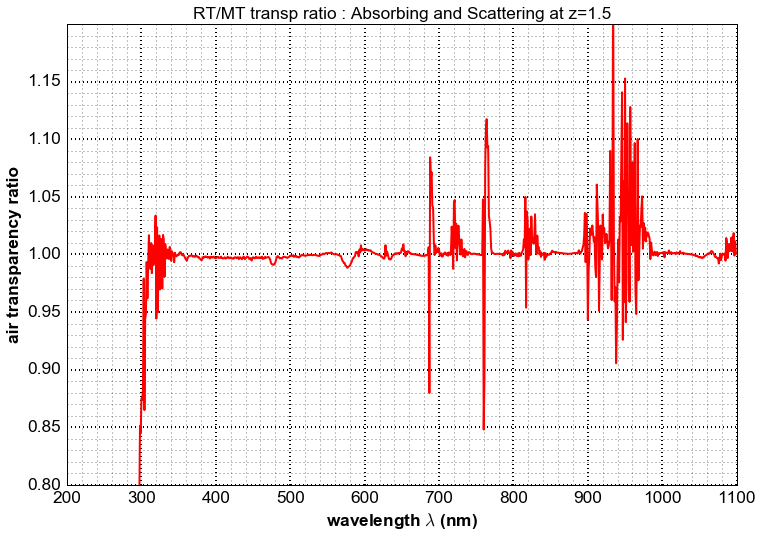

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

indexes=np.where(np.logical_and(x_rt_4>=WLMIN,x_rt_4<=WLMAX))

newx=x_rt_4[indexes] ; newy=y_rt_4[indexes] ;  # libradtran

newymt=interpol_atm_mt(newx) # modtran

ratio=newy/newymt
ax.plot(newx,ratio,"r-",lw=2)
ax.set_title("RT/MT transp ratio : Absorbing and Scattering at z=1.5")
ax.set_xlabel("wavelength $\lambda$ (nm)")
ax.set_ylabel("air transparency ratio")
ax.set_ylim(00.8,1.2)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)

## 4) Magnitude comparison

In [25]:
exponent=-1

In [26]:
wl,sed=magnit.MakeSED(lambda_min=300.,lambda_max=1099.,dlambda=1.,slope=exponent)
sed/=10.

In [27]:
flt=magnit.Filter()    
wl_u,u=flt.get_u_tr()
wl_g,g=flt.get_g_tr()
wl_r,r=flt.get_r_tr()
wl_i,i=flt.get_i_tr()
wl_z,z=flt.get_z_tr()
wl_y4,y4=flt.get_y4_tr()

In [28]:
mag=magnit.LSST_Magnitude() 

### Modtran : Flux at CCD

In [29]:
fl1_u_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_u,u)
fl1_g_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_g,g)
fl1_r_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_r,r)
fl1_i_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_i,i)
fl1_z_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_z,z)
fl1_y4_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_y4,y4)

### LibRadTran : Flux at CCD

In [30]:
fl1_u_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_u,u)
fl1_g_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_g,g)
fl1_r_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_r,r)
fl1_i_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_i,i)
fl1_z_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_z,z)
fl1_y4_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_y4,y4)

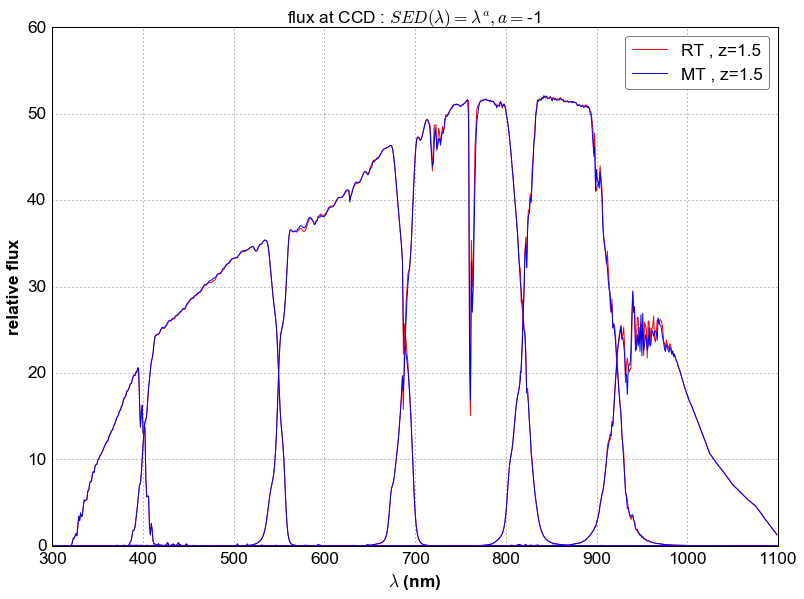

In [31]:
plt.plot(wl,fl1_u_rt,'r-',label='RT , z=1.5')
plt.plot(wl,fl1_u_mt,'b-',label='MT , z=1.5') 

plt.plot(wl,fl1_g_rt,'r-')
plt.plot(wl,fl1_g_mt,'b-')

plt.plot(wl,fl1_r_rt,'r-')
plt.plot(wl,fl1_r_mt,'b-')

plt.plot(wl,fl1_i_rt,'r-')
plt.plot(wl,fl1_i_mt,'b-')

plt.plot(wl,fl1_z_rt,'r-')
plt.plot(wl,fl1_z_mt,'b-')

plt.plot(wl,fl1_y4_rt,'r-')
plt.plot(wl,fl1_y4_mt,'b-')

thetitle = 'flux at CCD : $SED(\lambda) = \lambda^a , a= ${} '.format(exponent)
plt.title(thetitle)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('relative flux')
plt.legend(loc=1)
plt.savefig("compmagnit.jpg")

### Modtran magnitudes

In [32]:
m_fl1_u_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_u,u)
m_fl1_g_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_g,g)
m_fl1_r_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_r,r)
m_fl1_i_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_i,i)
m_fl1_z_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_z,z)
m_fl1_y4_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_y4,y4)

### LibRadTran magnitudes

In [33]:
m_fl1_u_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_u,u)
m_fl1_g_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_g,g)
m_fl1_r_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_r,r)
m_fl1_i_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_i,i)
m_fl1_z_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_z,z)
m_fl1_y4_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_y4,y4)

In [34]:
du=(m_fl1_u_rt - m_fl1_u_mt)*1000.
dg=(m_fl1_g_rt - m_fl1_g_mt)*1000.
dr=(m_fl1_r_rt - m_fl1_r_mt)*1000.
di=(m_fl1_i_rt - m_fl1_i_mt)*1000.
dz=(m_fl1_z_rt - m_fl1_z_mt)*1000.
dy4=(m_fl1_y4_rt - m_fl1_y4_mt)*1000.

In [35]:
print 'U(RT) - U(MT) = {:3.2f} mmag '.format(du)
print 'G(RT) - G(MT) = {:3.2f} mmag '.format(dg)
print 'R(RT) - R(MT) = {:3.2f} mmag '.format(dr)
print 'I(RT) - I(MT) = {:3.2f} mmag '.format(di)
print 'Z(RT) - Z(MT) = {:3.2f} mmag '.format(dz)
print 'Y4(RT) -Y4(MT) = {:3.2f} mmag '.format(dy4)

U(RT) - U(MT) = 2.17 mmag 
G(RT) - G(MT) = 2.52 mmag 
R(RT) - R(MT) = -0.54 mmag 
I(RT) - I(MT) = -6.95 mmag 
Z(RT) - Z(MT) = -5.54 mmag 
Y4(RT) -Y4(MT) = -12.74 mmag 


## Defines the functions
=============================

In [46]:
def GetFluxCCD_Modtran(wl,sed):
    fl_u_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_u,u)
    fl_g_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_g,g)
    fl_r_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_r,r)
    fl_i_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_i,i)
    fl_z_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_z,z)
    fl_y4_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_y4,y4)
    return [fl_u_mt, fl_g_mt, fl_r_mt, fl_i_mt , fl_z_mt , fl_y4_mt ]

In [47]:
def GetFluxCCD_LibRadtran(wl,sed):
    fl_u_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_u,u)
    fl_g_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_g,g)
    fl_r_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_r,r)
    fl_i_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_i,i)
    fl_z_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_z,z)
    fl_y4_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_y4,y4)
    return [fl_u_rt, fl_g_rt, fl_r_rt, fl_i_rt , fl_z_rt , fl_y4_rt ]

In [48]:
def GetMagnitude_Modtran(wl,sed):
    m_fl_u_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_u,u)
    m_fl_g_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_g,g)
    m_fl_r_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_r,r)
    m_fl_i_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_i,i)
    m_fl_z_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_z,z)
    m_fl_y4_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_y4,y4)
    return np.array([m_fl_u_mt, m_fl_g_mt, m_fl_r_mt, m_fl_i_mt , m_fl_z_mt , m_fl_y4_mt ])
    

In [86]:
def GetMagnitude_LibRadtran(wl,sed):
    m_fl_u_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_u,u)
    m_fl_g_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_g,g)
    m_fl_r_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_r,r)
    m_fl_i_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_i,i)
    m_fl_z_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_z,z)
    m_fl_y4_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_y4,y4)
    return np.array([m_fl_u_rt, m_fl_g_rt, m_fl_r_rt, m_fl_i_rt , m_fl_z_rt , m_fl_y4_rt ])

In [52]:
def PlotFluxatCCD(wl,fl_rt,fl_mt,thetitle,figfilename):
    
    plt.plot(wl,fl_rt[0],'r-',label='RT , z=1.5')
    plt.plot(wl,fl_mt[0],'b-',label='MT , z=1.5') 

    for index in range(1,6):
        plt.plot(wl,fl_rt[index],'r-')
        plt.plot(wl,fl_mt[index],'b-') 
     
    plt.title(thetitle)
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('relative flux')
    plt.legend(loc=1)
    plt.savefig(figfilename)

In [93]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [98]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

In [113]:
def ShowMagnitudeTable(mag_rt,mag_mt):
    diff_mag=(mag_ccd_rt - mag_ccd_mt)*1000. # transform into  mmag
    diffmag_cut=np.trunc(diff_mag*100)/100.  # cut not signiticative digit
    table = ListTable()
    table.append(['U (mmag)', 'G(mmag)', 'R(mmag)', 'I(mmag)', 'Z(mmag)', 'Y4(mmag)'])
    table.append(diffmag_cut)
    return table    

## Star
=========

In [38]:
fullfilename_star=os.path.join(path_sed,filename_star[0])

In [44]:
wl_star,sed_star=magnit.ReadSED(fullfilename_star)

In [75]:
title=filename_star[0]

In [82]:
split_str=title.split(".")
len_str=len(split_str)
split_str[len_str-1]='.pdf'
figfilename=string.join(split_str,sep='')

### the flux at CCD
---------------------

In [50]:
flux_ccd_mt=GetFluxCCD_Modtran(wl_star,sed_star)

In [51]:
flux_ccd_rt=GetFluxCCD_LibRadtran(wl_star,sed_star)

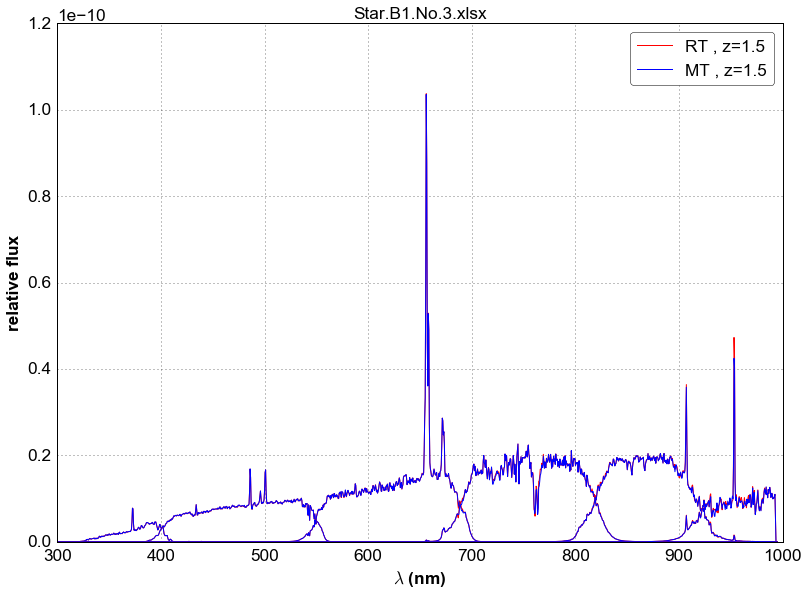

In [83]:
PlotFluxatCCD(wl_star,flux_ccd_rt,flux_ccd_mt,title,figfilename)

### The magnitude
--------------------

In [87]:
mag_ccd_mt=GetMagnitude_Modtran(wl_star,sed_star)

In [88]:
mag_ccd_rt=GetMagnitude_LibRadtran(wl_star,sed_star)

In [114]:
table=ShowMagnitudeTable(mag_ccd_rt,mag_ccd_mt)

In [115]:
table

U (mmag),G(mmag),R(mmag),I(mmag),Z(mmag),Y4(mmag)
2.26,2.49,-0.75,-6.58,-5.75,-21.81


## Galaxies

In [116]:
fullfilename_gal= [  os.path.join(path_sed,filename_gal[i])  for i in range(0,3) ]

In [121]:
wl_gal_1,sed_gal_1=magnit.ReadSED(fullfilename_gal[0])

In [122]:
title=filename_gal[0]

In [119]:
split_str=title.split(".")
len_str=len(split_str)
split_str[len_str-1]='.pdf'
figfilename=string.join(split_str,sep='')

In [126]:
wl_gal_1.shape[0]

1395

In [127]:
sed_gal_1.shape[0]

1395

In [123]:
flux_ccd_mt=GetFluxCCD_Modtran(wl_gal_1,sed_gal_1)

ValueError: x and y arrays must be equal in length along interpolation axis.

In [124]:
flux_ccd_rt=GetFluxCCD_LibRadtran(wl_gal_1,wl_gal_1)

ValueError: x and y arrays must be equal in length along interpolation axis.